## Guided Project: Storytelling Data Visualization on Exchange Rates

we're going to use this data set available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020), the dataset we'll use describes Euro daily exchange rates between 1999 and 2021
let's start by reading in the dataset. 

In [1]:
import pandas as pd


exchange_rates = pd.read_csv("euro-daily-hist_1999_2021.csv")
exchange_rates.head()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,2021-09-20,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,...,86.0700,10.2173,1.5839,NaN,NaN,39.0620,10.1512,NaN,1.1711,17.3301
1,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,...,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891
2,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,...,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544
3,2021-09-15,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,...,85.9738,10.1360,1.5860,NaN,NaN,38.8650,9.9769,NaN,1.1824,16.8973
4,2021-09-14,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,...,86.1062,10.1453,1.5870,NaN,NaN,38.9270,9.9848,NaN,1.1814,16.8097


In [2]:
exchange_rates.tail()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
5873,1999-01-08,NaN,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,...,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,NaN,1.1659,6.7855
5874,1999-01-07,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,...,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,NaN,1.1632,6.8283
5875,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,...,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
5876,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,...,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975
5877,1999-01-04,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,...,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,NaN,1.1789,6.9358


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5878 non-null   object 
 1   [Argentine peso ]         5383 non-null   object 
 2   [Australian dollar ]      5878 non-null   object 
 3   [Bulgarian lev ]          5476 non-null   object 
 4   [Brazilian real ]         5610 non-null   object 
 5   [Canadian dollar ]        5878 non-null   object 
 6   [Swiss franc ]            5878 non-null   object 
 7   [Chinese yuan renminbi ]  5610 non-null   object 
 8   [Cypriot pound ]          2346 non-null   object 
 9   [Czech koruna ]           5878 non-null   object 
 10  [Danish krone ]           5878 non-null   object 
 11  [Algerian dinar ]         5383 non-null   object 
 12  [Estonian kroon ]         3130 non-null   object 
 13  [UK pound sterling ]      5878 non-null   object 
 14  [Greek d

## Data Cleaning 



In [4]:
exchange_rates.rename(columns={"[Brazilian real ]":"BR_real",
                              "Period\\Unit:":"Time"},inplace=True)
exchange_rates["Time"]=pd.to_datetime(exchange_rates["Time"])
exchange_rates.sort_values("Time",inplace=True)
exchange_rates.reset_index(drop=True,inplace=True)
exchange_rates

,Time,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],BR_real,[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,1999-01-04,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,...,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,NaN,1.1789,6.9358
1,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,...,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975
2,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,...,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
3,1999-01-07,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,...,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,NaN,1.1632,6.8283
4,1999-01-08,NaN,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,...,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,NaN,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,2021-09-14,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,...,86.1062,10.1453,1.5870,NaN,NaN,38.9270,9.9848,NaN,1.1814,16.8097
5874,2021-09-15,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,...,85.9738,10.1360,1.5860,NaN,NaN,38.8650,9.9769,NaN,1.1824,16.8973
5875,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,...,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544
5876,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,...,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891


In [5]:
euro_to_real = exchange_rates[["Time","BR_real"]].copy()
euro_to_real.iloc[:,1].value_counts()

-         61
2.7570     4
3.3277     4
3.0909     4
3.3232     4
          ..
3.8063     1
1.6783     1
3.2793     1
4.0408     1
4.3301     1
Name: BR_real, Length: 5027, dtype: int64

we see that 61 values are a "-" character, let's dropp these values, and convert the others values to Float data type. 

In [6]:
euro_to_real = euro_to_real[euro_to_real["BR_real"]!= "-"]
euro_to_real["BR_real"] = euro_to_real['BR_real'].astype(float)
euro_to_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5817 entries, 0 to 5877
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     5817 non-null   datetime64[ns]
 1   BR_real  5549 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 136.3 KB


## média movél 

quando análisamos o gráfico abaixo temos muitas variacões na trend, essas pequenas variacões se devem pela media de cada dia. 

* para uma media mais clara vamos calcular a media para `BR_real` usando uma janela movel de 30 dias. 
* adicionar a media movel para uma nova coluna `rolling_mean`.

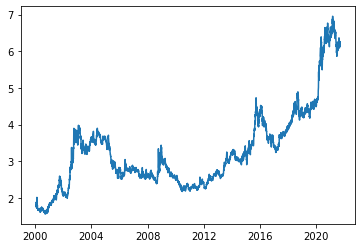

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(euro_to_real["Time"],euro_to_real["BR_real"])
plt.show()

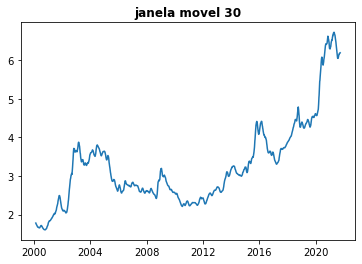

In [8]:
euro_to_real["rolling_mean"] = euro_to_real["BR_real"].rolling(30).mean()

euro_to_real["rolling_mean"]
plt.plot(euro_to_real["Time"],euro_to_real["rolling_mean"])
plt.title("janela movel 30",weight="bold")
plt.show()

Here are a few story ideas for our data:

* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
* We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot

<ipython-input-56-c45e5550768b>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['',  '2003', '', '2005', '',
<ipython-input-56-c45e5550768b>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["","2012","2013","2014","2015","2016"])
<ipython-input-56-c45e5550768b>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(["09/2016","","2017","","","","2018","","","","2019"])
<ipython-input-56-c45e5550768b>:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(["2019","","","2020","","","2021"])


lula mean R$2.84
dilma mean R$3.18
temer mean R$3.9
bolsonaro mean R$5.48


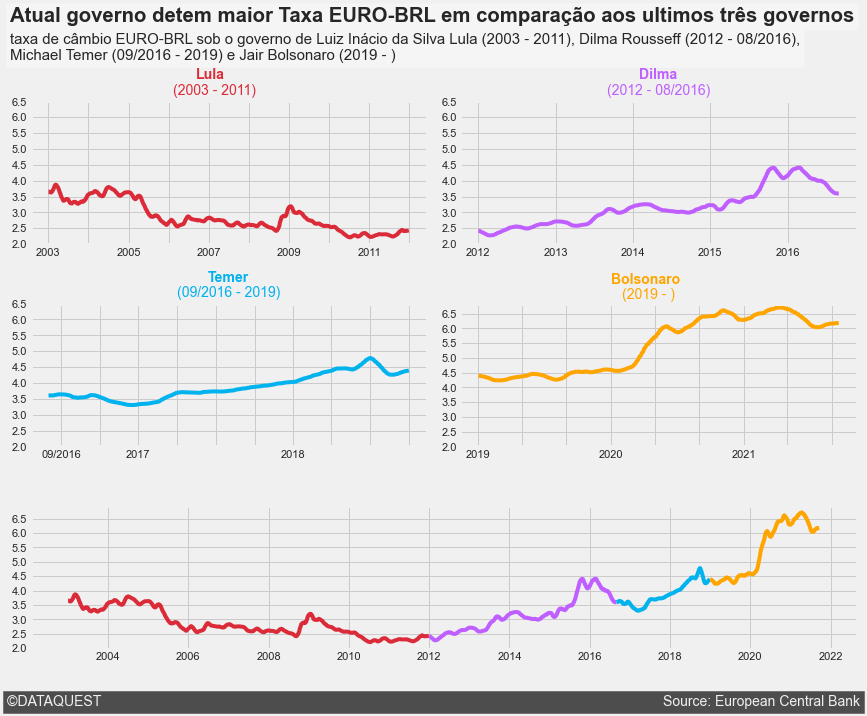

In [56]:
import seaborn as sns
#sns.set()
import datetime as dt


import matplotlib.style as style
style.use("fivethirtyeight")

plt.figure(figsize=(12,8))
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,1,3)

axes = [ax1,ax2,ax3,ax4,ax5]

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)


yticks = [2,2.5,3,3.5,4,4.5,5,5.5,6,6.5]



lula_dilma_temer_bozo = euro_to_real.copy()[(euro_to_real["Time"].dt.year >= 2003) & 
                                            (euro_to_real["Time"].dt.year <= 2021)]  

# axe 1
lula = lula_dilma_temer_bozo.copy()[lula_dilma_temer_bozo['Time'].dt.year < 2012]    
ax1.plot(lula["Time"],lula["rolling_mean"],color='#DB2B39') 
ax1.set_yticks(yticks)
ax1.text(13400,7.2,"Lula",color="#DB2B39",weight="bold")
ax1.text(13190,6.7,"(2003 - 2011)",color="#DB2B39")
ax1.set_xticklabels(['',  '2003', '', '2005', '',
                    '2007', '', '2009',"" ,"2011"])
print(f"lula mean R${2.84}")
    
   
# axe 2
data = pd.to_datetime("2016-08-31")
dilma = lula_dilma_temer_bozo.copy()[(lula_dilma_temer_bozo['Time'].dt.year >= 2012) & 
                                    (lula_dilma_temer_bozo['Time'].dt.date < data)] 
ax2.plot(dilma["Time"],dilma["rolling_mean"],color="#BF5FFF")
ax2.set_yticks(yticks)
ax2.set_xticklabels(["","2012","2013","2014","2015","2016"])
ax2.text(16100,7.2,"Dilma",color="#BF5FFF",weight="bold")
ax2.text(15950,6.7,"(2012 - 08/2016)",color="#BF5FFF")
print(f"dilma mean R${3.18}")

# axe 3

temer = lula_dilma_temer_bozo.copy()[(lula_dilma_temer_bozo["Time"].dt.date > data) & 
                                     (lula_dilma_temer_bozo["Time"].dt.year < 2019)]
ax3.plot(temer["Time"],temer["rolling_mean"],color="#00B2EE")
ax3.set_yticks(yticks)
ax3.text(17420,7.2,"Temer",color="#00B2EE",weight="bold")
ax3.text(17348,6.7,"(09/2016 - 2019)",color="#00B2EE")
ax3.set_xticklabels(["09/2016","","2017","","","","2018","","","","2019"])
print(f"temer mean R${3.90}")

# axe 4
bozo = lula_dilma_temer_bozo.copy()[(lula_dilma_temer_bozo["Time"].dt.year >= 2019)]
ax4.plot(bozo["Time"],bozo["rolling_mean"],color="#ffa500")
ax4.text(18262,7.5,"Bolsonaro",color="#ffa500",weight="bold")
ax4.text(18292,7,"(2019 - )",color="#ffa500")
ax4.set_yticks(yticks)
ax4.set_xticklabels(["2019","","","2020","","","2021"])
print(f"bolsonaro mean R${5.48}")

#axe 5
#ax5.plot(lula_dilma_temer_bozo["Time"],lula_dilma_temer_bozo["rolling_mean"])
ax5.set_yticks(yticks)
#ax5.set_xticks([])
ax5.plot(lula["Time"],lula["rolling_mean"],color='#DB2B39')
ax5.plot(dilma['Time'], dilma['rolling_mean'],
        color='#BF5FFF')
ax5.plot(temer['Time'], temer['rolling_mean'],
        color='#00B2EE')
ax5.plot(bozo['Time'], bozo['rolling_mean'],
        color='#ffa500')

# titulo e subtitulo
ax1.text(11700, 9, 'Atual governo detem maior Taxa EURO-BRL em comparação aos ultimos três governos',
         fontsize=20.3, weight='bold',backgroundcolor = '#f5f5f5')
ax1.text(11700, 7.8, '''taxa de câmbio EURO-BRL sob o governo de Luiz Inácio da Silva Lula (2003 - 2011), Dilma Rousseff (2012 - 08/2016),
Michael Temer (09/2016 - 2019) e Jair Bolsonaro (2019 - )''',
        fontsize=15,backgroundcolor = 'whitesmoke')

# assinatura
ax5.text(11500, 0, '©DATAQUEST' + ' '*145 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)


plt.show()

no gráfico acima temos três picos relevantes nos ultimos 3 governos, 
* um pico duplo no final e começo de 2016
* em meados de outubro de 2018 
* em março de 2020

sendo o último o maior dos aumentos

...
